In [76]:
# Importiert die Funktion imshow, mit der wir später Bilder im Notebook anschauen können.
from matplotlib.pyplot import imshow



# -------------------------------------------------------------------------------------------------------------------------------
# Import der Numpy-Library
import numpy as np

In [77]:
"""
Ein npy-array ist die Datenstruktur der numpy-library und entspricht den Matrizen/Vektoren
aus der Linearen Algebra (ein Teilgebiet der Mathematik).
Alle üblichen Deep Learning-Libraries (Tensorflow/Keras, Pytorch, Jax) basieren auf numpy-arrays.

Grundsätzlich ist ein npy-array eine (verschachtelte) Liste von Zahlen.

Ein 2-dimensionales npy-array a könnten wir etwa folgendermaßen erstellen:
"""

a = np.array([
    [0, 1, -6],
    [2, -3, 4],
    [-5, -4, 5],
    [-1, -2, 6]
])

# Wir können den Inhalt des arrays ausgeben.
print(a)

"""
Das array hat die Form (4, 3), was bedeutet, dass a
4 Listen beinhaltet, die jeweils 3 Zahlen beinhalten.
Wir können die Form mittels der Methode .shape abfragen:
"""

a.shape

[[ 0  1 -6]
 [ 2 -3  4]
 [-5 -4  5]
 [-1 -2  6]]


(4, 3)

In [78]:
"""
Numpy-arrays erlauben im Gegensatz zu Python-listen mathematische Operationen.

a + 3 --> addiert 3 auf jedes Element von a.
"""
print('a + 3:')
print(a + 3)

a + 3:
[[ 3  4 -3]
 [ 5  0  7]
 [-2 -1  8]
 [ 2  1  9]]


In [79]:
"""
a * 2 --> verdoppelt jedes Element von a
a - x ...
a / x ...
a **x ...
a % x ...
...
"""

print('a * 2:')
print(a * 2)

a * 2:
[[  0   2 -12]
 [  4  -6   8]
 [-10  -8  10]
 [ -2  -4  12]]


(1184, 1776, 3)


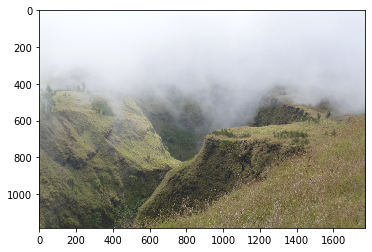

In [168]:
"""
Numpy-arrays eignen sich dazu große Datenmengen effizient zu verarbeiten.
Wir können beispielsweise eine RGB-Bilddatei als 3-dimensionales npy-array darstellen.

Der Variable 'img' ein npy-array zugewiesen, welches die Pixeldaten des jpg-Files im
Pfad 'misc/img.jpg' beinhaltet. Wir importieren dazu zuvor zwei Funktionen der image-library open-cv.

Mittels der Methode .shape des imgs können wir sehen, dass das Bild eine Höhe von 1184 Pixeln sowie eine
Breite von 1776 Pixeln besitzt. Jedem dieser Pixel sind 3 Zahlen zugeordnet [R, G, B].
Ein RGB-Bild ist also gewissermaßen eine 3-dimensionale Datenstruktur mit den Dimensionen: [Höhe, Breite, Farbkanäle]
"""
from cv2 import imread, cvtColor, COLOR_BGR2RGB

img = cvtColor(imread('misc/img.jpg'), COLOR_BGR2RGB)
print(img.shape)

# Werfen wir einen Blick darauf.
imshow(img)

In [82]:
"""
Die zweite wichtige Eigenschaft eines npy-arrays ist der Datentyp.
Wir können sie durch die Methode .dtype abfragen.

Der Datentyp definiert, welche Art von Zahlen (Ganze oder Fließkommazahlen) im array abgelegt sind
und welcher Zahlenumfang vom jeweiligen Datentyp darstellbar ist.

bool    :   Nur 0 oder 1
int8    :   Ganze Zahlen von -128 bis 127
uint8   :   Ganze Zahlen von 0 bis 255
int16   :   Ganze Zahlen von -32768 bis 32767
int32   :   Ganze Zahlen von -2147483648 bis 2147483647
int64   :   ...
float16 :   Fließkommazahlen von -219687577.1904 bis 219687577.1904
float32 :   ...

Bilddatein mit einer Bittiefe von 8 benötigen lediglich die Zahlen von 0 von 255.
Unser array img ist dementsprechend vom Datentype uint8.
"""

print(img.dtype)

uint8


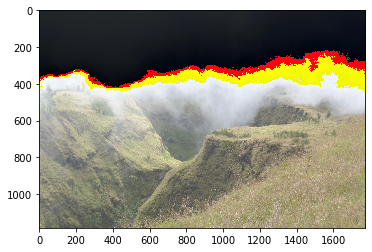

In [134]:
"""
Mittels mathematischer Operationen lassen sich nun primitive Bildmanipulationen vollziehen.
Beispielsweise könnten wir die Helligkeit erhöhen, indem wir alle Farbwerte anheben.
Wir müssen jedoch den Datentyp beachten. Wenn wir beispielsweise 40 auf alle Elemente addieren,
könnte es passieren, dass manche Elemente größer werden als 255. Ist dies der Fall, so werden
die betroffenen Werte auf 0 zurückgestellt und es treten Fehler auf.
"""

img_bright = img + 40
imshow(img_bright)

(1184, 3552, 3)


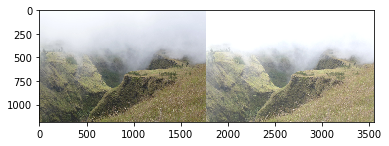

In [135]:
"""
Wir können dies verhindern imdem wir das Bild vorher in einen anderen Datentyp umwandeln, der größere
Zahlen zulässt.
Die Funktion np.int16() nimmt ein array und gibt selbiges array quasi unverändert, jedoch mit dem Datentyp int16 zurück.
Anschließend erhöhen wir jedes Element um 40.
"""

img_bright = np.int16(img)
img_bright = img_bright + 40

"""
Nun setzen wir jedes Element, welches größer als 255 ist, auf 255 herunter und wandeln den 
Datentyp zurück zu uint8.
Die Funktion np.clip(array, min, max) vollzieht für jedes Element x aus array die folgende Logik:
    If x < min, then x = min
    If x > max, then x = max
Wir setzen im code unten min = 0, und max = 255. D.h. Alle Werte in img_bright, die kleiner
als 0 sind werden auf 0 (für uns hier nicht relevant) und alle Werte, die größer als 255 sind
auf 255 gesetzt (für uns relevant).
"""

img_bright = np.clip(img_bright, 0, 255)
img_bright = np.uint8(img_bright)

"""
Damit wir den Unterschied betrachten können konkatenieren (= zusammenfügen) wir das ursprüngliche img
mit dem helleren img_bright entlang der 1. Dimension.
Der erste Index einer Liste liegt für Programmierer an Stelle 0, d.h. die 1. Dimension entspricht
für die Liste der Dimensionen [Höhe, Breite, Farbkanäle] der Breite.
Numpy spricht bei der Dimension gerne auch von der 'axis'. Das erste Argument ist eine python-Liste der beiden
Arrays, die es zu konkatenieren gilt.
Es ist nun zu erwarten, dass das zusammengefügte Bild 'both_imgs' die doppelte Breite hat. Überprüfen wir es mit .shape.
"""
both_imgs = np.concatenate([img, img_bright], axis=1)
print(both_imgs.shape)
imshow(both_imgs)

In [85]:
# Zurück zu unserem ersten array a.
print(a)

"""
Wir können auf einzelne Elemente oder arrays innerhalb des arrays via Indexing zugreifen.
Etwa ist auf die 1. Liste von a zugreifbar durch a[0]
"""
print('Erste Liste:')
print(a[0])

"""
Das zweite Element der dritten Liste ist a[2][1]
"""
print('Zweites Element der dritten Liste:')
print(a[2][1])

"""
Und wir können auch mittels negativer Indizes in entgegengesetzter 
Richtung indizieren. Das vorletzte Element der letzten Liste ist etwa a[-1][-2]
"""
print('Vorletztes Element der letzten Liste:')
print(a[-1][-2])

[[ 0  1 -6]
 [ 2 -3  4]
 [-5 -4  5]
 [-1 -2  6]]
Erste Liste:
[ 0  1 -6]
Zweites Element der dritten Liste:
-4
Vorletztes Element der letzten Liste:
-2


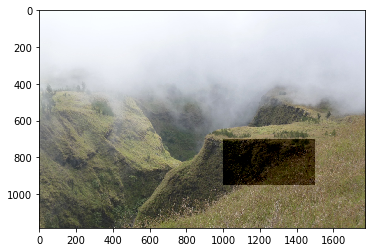

In [136]:
"""
Auf Ausschnitte, die mehrere Elemente oder Listen beinhalten lässt sich per 'Slicing' zugreifen.
Beispielhaft könnten wir einen Teil des arrays ausschneiden, indem wir für jede Dimension
durch einen : getrennte Indizes schreiben, die die Grenzen des Ausschnitts entlang der jeweiligen
Dimension definieren. 
img[700:950, 1000:5000] ist gleichbedeutend mit dem Ausschnitt aller Pixel, die zw. dem 700ten (einschließend)
und 950ten (ausschließend) Pixel entlang der Bildhöhe und dem 1000ten (einschließend) und 1500ten (ausschließend)
Pixel entlang der Bildbreite liegen.
Wir könnten eine Operation auf ebendiesen Bereich anwenden. Vorher bietet es sich an eine Kopie des imgs in einer
neuen Variable abzulegen.
Übrigens: In Python ist jede Operation wie beispielhaft 'a = a - x' auch kürzer schreibbar als 'a -= x', was sich hier anbietet.
"""

img_slicemod = np.int16(img)
img_slicemod[700:950, 1000:1500] -= 77
img_slicemod = np.clip(img_slicemod, 0, 255)
img_slicemod = np.uint8(img_slicemod)

imshow(img_slicemod)

In [144]:
"""
Erzeugen wir ein weiters array b, welches die selbe Form wie a hat
und zufällige Ganze Zahlen zwischen -9 (einschließend) und 10 (ausschließend) beinhaltet.
Die Funktion random.randint(low, high, shape) kann genau das.
"""

b = np.random.randint(-9, 10, a.shape)
print('b')
print(b)

"""
Wir können per Slicing oder Indexing einzelne Elemente oder ganze Teile eines arrays ersetzen.
np.ones((3,)) gibt uns ein array der Form (3,) welches an jedem Punkt die Zahl 1 enthält.
Ersetzen wir damit die 2. Liste von b.
"""
c = np.ones((3,))
print('c')
print(c)
b[1] = c
print('b mit durch c ersetzter 2ter Liste')
print(b)

"""
Selbstverständlich funktioniert dieses Prinzip auch für einzelne Zahlen. Ersetzen wir also das letzte Element
der ersten Liste durch die Zahl 13.
"""
b[0][-1] = 13
print('b mit durch 13 ersetztem letzten Element in der ersten Liste')
print(b)


b
[[ 0  5 -3]
 [-6 -5 -7]
 [-8 -7  6]
 [ 8  6  9]]
c
[1. 1. 1.]
b mit durch c ersetzter 2ter Liste
[[ 0  5 -3]
 [ 1  1  1]
 [-8 -7  6]
 [ 8  6  9]]
b mit durch 13 ersetzem letzten Element in der ersten Liste
[[ 0  5 13]
 [ 1  1  1]
 [-8 -7  6]
 [ 8  6  9]]


In [145]:
"""
Operationen zwischen npy-arrays gleicher Form sind möglich. Hierbei werden die Operation punktweise, also zw. jenen
Elementen, die die gleiche Position innerhalb ihrer jeweiligen arrays besetzen, ausgeführt, also gilt für 2 gleichgeformte
arrays, die mindestens 2 Dimensionen haben:
a + b = c, wobei
c[0][0] = a[0][0] + b[0][0]
c[0][1] = a[0][1] + b[0][1]
...
c[-1][-1] = a[-1][-1] + b[-1][-1]
"""

print('a')
print(a)
print('b')
print(b)
print('a*b')
print(a*b)

a
[[ 0  1 -6]
 [ 2 -3  4]
 [-5 -4  5]
 [-1 -2  6]]
b
[[ 0  5 13]
 [ 1  1  1]
 [-8 -7  6]
 [ 8  6  9]]
a*b
[[  0   5 -78]
 [  2  -3   4]
 [ 40  28  30]
 [ -8 -12  54]]


In [120]:
"""
Eine Operation zwischen arrays unterschiedlichen Shapes haben wir schon gesehen.
Nämlich jene zwischen einem array des Shapes (4, 3) und einer Zahl.
Ein array, das nur aus einem Scalar (= einer Zahl) besteht, hat entweder den Shape (1,) oder (),
was in numpy gleichbedeutend ist.

Operationen sind außerdem in weiteren Konstellationen möglich:

1.)
Eine Operation zw. a mit shape (m, n) und b mit shape (m, 1) resultiert in c mit shape (m, n).
Es gilt:
c=[0][0] = a[0][0] + c[0][0]
c=[0][1] = a[0][1] + c[0][0]
...
c=[-1][-1] = a[-1][-1] + c[-1][0]

Zu deutsch: Für jeden Index entlang der 1. Dimension wird die Operation zw. der in a liegenden
Liste an diesem Index und dem in b liegenden Scalar an diesem Index ausgeführt.

Beispiel:
"""

b = np.array([
    [0,],
    [1,],
    [0,],
    [-1,]
    ])
print(a.shape, b.shape)

print('a')
print(a)
print('b')
print(b)
print('a*b')
print(a*b)

(4, 3) (4, 1)
a
[[ 0  1 -6]
 [ 2 -3  4]
 [-5 -4  5]
 [-1 -2  6]]
b
[[ 0]
 [ 1]
 [ 0]
 [-1]]
a*b
[[ 0  0  0]
 [ 2 -3  4]
 [ 0  0  0]
 [ 1  2 -6]]


In [146]:
"""
2.)
Eine Operation zw. a mit shape (m, n) und b mit shape (1, n) resultiert in c mit shape (m, n).
Es gilt:
c=[0][0] = a[0][0] + c[0][0]
c=[0][1] = a[0][1] + c[0][1]
...
c=[-1][-1] = a[-1][-1] + c[0][-1]

Zu deutsch: Die Operation wird zw. jeder in a entlang der 1. Dimension liegenden Liste und der einzigen
in b entlang der 1. Dimension liegenden Liste punktweise vollzogen.

Schauen wir uns das Beispiel an:
"""

b = np.array([[0, 1, -1]])
print(a.shape, b.shape)
print('a')
print(a)
print('b')
print(b)
print('a*b')
print(a*b)

(4, 3) (1, 3)
a
[[ 0  1 -6]
 [ 2 -3  4]
 [-5 -4  5]
 [-1 -2  6]]
b
[[ 0  1 -1]]
a*b
[[ 0  1  6]
 [ 0 -3 -4]
 [ 0 -4 -5]
 [ 0 -2 -6]]


In [ ]:
"""
Obgleich wir bisher nur 0- bis 3-dimensionale arrays betrachtet haben, so können wir viel höher-dimensionale arrays
in numpy nach den selben Prinzipien verarbeiten.
Beispielsweise wären Videodaten 4-dimensional: [Frame, Höhe, Breite, Farbkanäle]

Zusammenfassend sind Operationen zwischen arrays der folgenden shapes zulässig, wobei die ... bedeuten sollen,
dass keine bis theoretisch nahezu unendlich viele weitere Dimensionen vorkommen können.

(m,)        + ()
(m,)        + (1,)
(m, ...)    + ()
(m, ...)    + (1,)

In diesem Szenario müssen die Größen der durch ... dargestellten Dimensionen bei beiden arrays identisch sein.
(m, ...)    + (m, ...)

In diesen beiden Konstellationen stehen die ... der jeweils rechts vom +-Zeichen stehenden shapes
ausschließlich für Dimensionen der Größe 1, während die Dimensionen der zur Linken stehenden shapes jeden Wert annehmen können.
(..., m) + (..., n) 
(m, ...) + (m, ...)
"""

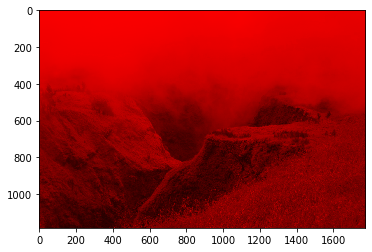

In [166]:
"""
Verfeinern wir abschließend unsere Kenntnisse vom Slicing und Operationen mit dem folgender Aufgabe.
Der grüne und blaue Farbkanal von img soll für jeden Pixel auf 0 gestellt werden. Und wir wollen es
per Slicing lösen.

Legen wir zuerst eine Kopie von img an und nennen diese img_red.

Der Slice img_red[0:-1, 0:-1, 1:3] greift auf alle Listen entlang der Höhe, anschließend auf alle
darin vorkommenen RGB-Listen entlang der Breite und letztlich auf den in diesen liegenden 2. und 3. Eintrag zu,

Übrigens ist Slicing auch kürzer schreibbar:
[0:20]  = [:20]
[20:-1] = [20:]

Wir könnten also den Slice unten auch als img_red[:, :, 1:] ausdrücken.
"""

img_red = np.copy(img)
img_red[0:-1, 0:-1, 1:3] = 0
imshow(img_red)

(3,)
(1, 1, 3)


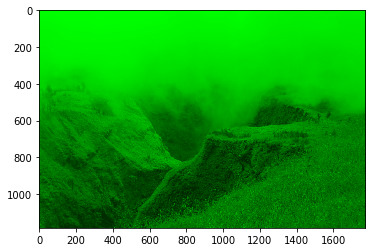

In [169]:
"""
Nun sollen jeweils der rote und blaue Farbkanal von img für jeden Pixel auf 0 gestellt werden.
Und wir wollen dies dieses mal mittels einer Operation erreichen.

Wir wissen, dass unser img den Shape (Höhe, Breite, 3) hat und, dass unser Ziel darin besteht,
dass jede Liste, die die RGB-Kanäle eines Pixels repräsentiert der Form [0, G, 0] sein soll.
Dies können wir erreichen, indem wir auf jeden dieser RGB-Listen die Liste [0, 1, 0] punktweise
multiplizieren.
Wir legen also die entsprechende Liste 'mask' an.
"""
mask = np.array([0, 1, 0])

"""
Anschließend sorgen wir dafür, dass sie den Shape (1, 1, 3) besitzt.
Die Funktion np.expand_dims(arr, axis) erlaubt es am Index axis eine neue Dimension hinzuzufügen.
Wir fügen also zweimal eine neue 1. Dimension hinzu, sodass der gewünschte Shape resultiert.
Anschließend können wir multiplizieren.
"""
print(mask.shape)
mask = np.expand_dims(np.expand_dims(mask, axis=0), axis=0)
print(mask.shape)
imshow(img*mask)

(1184, 1776, 1)
float64
uint8
(1184, 1776, 3)


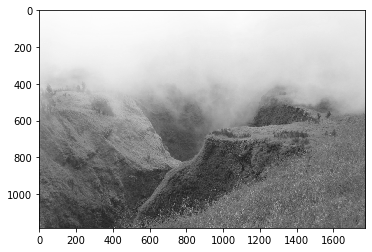

In [179]:
"""
Werfen wir abschließend noch einen kurzen Blick auf destruktive Funktionen, die die Dimensionen eines arrays verringern können.
Destruktive Funktionen sind solche, die nicht umgekehrt werden können. Beispielsweise sind die Eliminierungen von Farbkanälen
in den vorangegangen Beispielen destruktive Funktionen, da sie nicht umkehrbar sind, insofern man nicht das Wissen vom ursprünglichen
img besitzt.

Im Kontext von Bilddaten wäre auch die Umwandlung des Bildes in eine schwarz-weiß-Repräsentation destruktiv.
Um eine solche zu erreichen, müssen wir uns für eine Funktion entscheiden, die unter Nutzung der Informationen in den RGB-Listen
des Bildes jedem Pixel einen einzigen Wert zuordnet, der die Helligkeit dieses Pixels repräsentiert.

Wir möchten also eine Funktion bauen, die ein arr der Form (x, y, 3) in ein array der Form (x, y, 1) oder (x, y) transformiert.
Die Form (x, y, 1) unterscheidet sich von (x, y) nur dadurch, dass in jenem die Listen entlang der 2. Dimension 
Listen von einem einzigen Element beinhalten, während in diesem die Listen entlang der 2. Dimension die Elemente direkt beinhalten.

Eine simple Transformation wäre für jeden Pixel den jeweiligen Durchschnitts-Wert der RGB-Liste als Helligkeit zu verwenden.
np.mean(arr, axis) erlaubt es den Durchschnitt entlang einer Dimension zu berechnen.

Bemerke, dass der Durchschnitt von ganzen Zahlen Fließkommazahlen produzieren kann. Bspw. (200 + 201 + 200) / 3 = 200.33333333333
Dadurch ist der resultierende .dtype von img_grayscale float64 anstelle von uint8. Wir konvertieren ihn zurück zu uint8, hierbei
werden Fließkommazahlen abwärts gerundet.

Übergeben wir das Argument keepdims=True (='keep dimensions'), so ist der resultierende shape (x, y, 1). Lassen wir das Argument
weg oder setzen es False, so werden überflüssige Dimensionen nicht erhalten und der resultierende shape wäre (x, y).
"""
img_grayscale = np.mean(img, axis=2, keepdims=True)
print(img_grayscale.shape)
print(img_grayscale.dtype)
img_grayscale = np.uint8(img_grayscale)
print(img_grayscale.dtype)

"""
Da die Funktion imshow nur Bilder mit 3 Farbkanälen unterstützt, img_grayscale jedoch in (x, y, 1) vorliegt wiederholen wir das
array 3mal entlang der Farbkanal-Dimension.
"""
img_grayscale = np.repeat(img_grayscale, repeats=3, axis=2)
print(img_grayscale.shape)
imshow(img_grayscale)

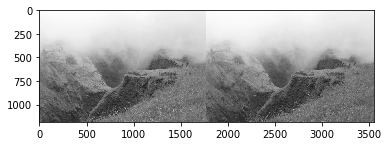

In [183]:
"""
Da unser Auge verschieden empfindlich für die verschiedenen Lichtspektren ist macht es Sinn, die Lichtkanäle verschieden zu gewichten,
bevor wir aus ihnen einen Helligkeitswert errechnen.
Eine übliche Gewichtung für [R, G, B] ist [0.299, 0.587, 0.114]. Um diese Gewichtung zu berücksichtigen multiplizieren wir diese Liste
auf jede RGB-Liste von img und summieren diese anschließend.
"""
weights = np.array([0.299, 0.587, 0.114])
weights = np.expand_dims(np.expand_dims(weights, axis=0), axis=0)

img_grayscale_weighted = np.sum(img*weights, axis=2, keepdims=True)
img_grayscale_weighted = np.uint8(img_grayscale_weighted)

img_grayscale_weighted = np.repeat(img_grayscale_weighted, repeats=3, axis=2)
both_imgs = np.concatenate([img_grayscale_weighted, img_grayscale], axis=1)
imshow(both_imgs)

In [ ]:
"""
Endbemerkung:

Die Funktionalitäten von numpy verinnerlicht schnells, wenn man codet.
Es hilft nach der Anwendung von Slicing, Funktionen oder Indexing arrays, insofern sie klein genug sind um in die Kommandozeile zu passen
einfach zu printen oder mittels .shape oder .dtype zu überprüfen, ob auch passiert ist was man vorhatte.
Funktionen wie np.sum, np.min oder np.max können hilfreich sein um numerische Fehler zu finden.
"""